In [41]:
import Update_GM2

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.format'] = 'svg'
plt.rcParams['animation.frame_format'] = 'svg'
plt.rcParams["figure.figsize"] = (10, 5.5)
plt.rcParams["backend"] = "QtAgg"

# This gets the path where the MacroBackend is stored, so it can be imported.
# This is done with the in develpment version of the repo as an alternative to having the repo available  on pip as a finished package.

import os
wd = %pwd   #The current working directory is the one where this notebook file is stored
parent = os.path.dirname(wd); grampa = os.path.dirname(parent) #The parent directory of the current working directory is the repo's root directory
import sys
sys.path.append(grampa) #We add the root directory to the system path, so the MacroBackend can be imported

from MacroBackend import Pull_Data


In [35]:
USM2 = Pull_Data.dataset()
USM2.get_data("fred", "M2SL")
CNM2 = Pull_Data.dataset()
CNM2.get_data("tv", "CNM2", exchange_code="ECONOMICS")
print(USM2.data, CNM2.data)

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  fred data code:  M2SL
FRED API response:  200


Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  tv data code:  CNM2
Number of days of data for  CNM2 :  82101
Pulling data from trading view. Ticker:  CNM2 , exchange:  ECONOMICS 
Data time frame:  Monthly M , number of days:  82101 , fraction of max data pull length:  0.5474 , number of datapoints:  2737 , loop:  2
CNM2 ECONOMICS 0
Symbol:Exchange:  ECONOMICS:CNM2 
 time interval:  1M 
 number of bars requested:  2737
{'date': 'Mon, 14 Oct 2024 06:47:08 GMT', 'connection': 'upgrade', 'sec-websocket-accept': 'eV1Poxt+LOx3PY6MUnH1hQshGFA=', 'upgrade': 'websocket', 'server': 'tv'} 101 101
Data received length:  344 start date:  1996-01-01 11:00:00 end date:  2024-08-01 10:00:00 10439 days 23:00:00
Data pulled from TV for ticker:  CNM2
date
1959-01-01      286.6
1959-02-01      287.7
1959-03-01      289.2
1959-04-01      290.1
1959-05-01      292.2
               ...   
2024

In [36]:
USDCNY = Pull_Data.dataset()
USDCNY.get_data("tv", "USDCNY", start_date = CNM2.data.index[0].strftime("%Y-%m-%d"), exchange_code="FX_IDC")

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
Looking for data from source:  tv data code:  USDCNY
Number of days of data for  USDCNY :  10514
Pulling data from trading view. Ticker:  USDCNY , exchange:  FX_IDC 
Data time frame:  Weekly W , number of days:  10514 , fraction of max data pull length:  0.3004 , number of datapoints:  1502 , loop:  1
USDCNY FX_IDC 0
Symbol:Exchange:  FX_IDC:USDCNY 
 time interval:  1W 
 number of bars requested:  1502
{'date': 'Mon, 14 Oct 2024 06:47:10 GMT', 'connection': 'upgrade', 'sec-websocket-accept': 'XlE3LQjhUDSeQp3xINkU3/kAcfQ=', 'upgrade': 'websocket', 'server': 'tv'} 101 101
Data received length:  1502 start date:  1996-01-08 09:00:00 end date:  2024-10-14 09:00:00 10507 days 00:00:00
Data pulled from TV for ticker:  USDCNY


In [37]:
import pandas as pd
datas = pd.concat([USM2.data[CNM2.data.index[0].strftime("%Y-%m-%d")::], CNM2.data, USDCNY.data], axis=1)

datas.tail(50)

,M2SL,CNM2,USDCNY
2023-12-11,NaN,NaN,7.1174
2023-12-18,NaN,NaN,7.1310
2023-12-25,NaN,NaN,7.0973
2024-01-01,20751.4,2.976250e+14,7.1390
2024-01-08,NaN,NaN,7.1660
2024-01-15,NaN,NaN,7.1926
2024-01-22,NaN,NaN,7.1758
2024-01-29,NaN,NaN,7.1915
2024-02-01,20744.4,2.995573e+14,NaN
2024-02-05,NaN,NaN,7.1924


<Axes: >

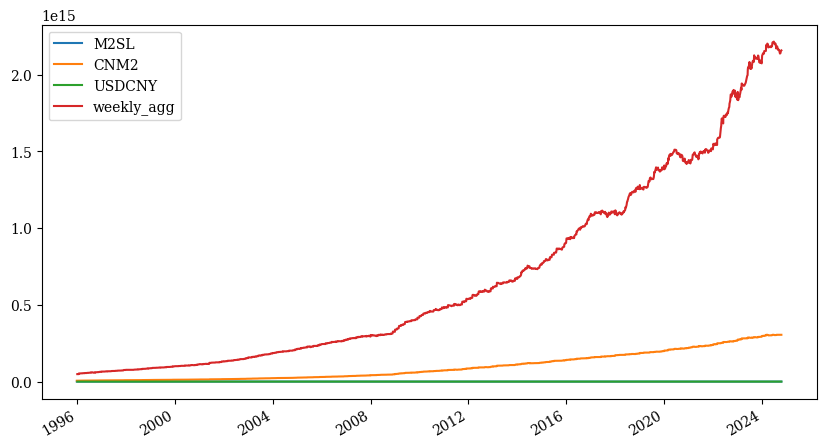

In [42]:
datas.ffill(inplace=True, axis=0)
datas["weekly_agg"] = (datas["CNM2"]*datas["USDCNY"]) + datas["M2SL"]
datas.plot()